In [55]:
#Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
#Veri seti
df_titanic = pd.read_csv("Titanic_dataset.csv")

In [25]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
df_titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df_titanic.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1.	Kazada ölenlerin yaş ortalamasını bulunuz

In [31]:
df_titanic[df_titanic['Survived'] == 0]['Age'].mean()


30.62617924528302

2.	Kazada ölenlerin bilet fiyatlarının ortalamasını ve medyanını bulunuz

In [33]:
dead_fares = df_titanic[df_titanic['Survived'] == 0]['Fare']
dead_fares.mean(), dead_fares.median()

(22.117886885245902, 10.5)

3.	Kazada ölen erkeklerin yaş ortalamasını bulunuz

In [35]:
df_titanic[(df_titanic['Survived'] == 0) & (df_titanic['Sex'] == 'male')]['Age'].mean()


31.618055555555557

4.	Kazada ölen Kadınların yaş ortalamasını bulunuz

In [37]:
df_titanic[(df_titanic['Survived'] == 0) & (df_titanic['Sex'] == 'female')]['Age'].mean()


25.046875

5.	Kazadan kurtulanların yaş ortalamasını bulunuz

In [39]:
df_titanic[df_titanic['Survived'] == 1]['Age'].mean()


28.343689655172415

6.	Kazadan kurtulanların bilet fiyatlarının ortalamasını bulunuz

In [41]:
df_titanic[df_titanic['Survived'] == 1]['Fare'].mean()


48.39540760233918

7.	Kazadan kurtulan toplam kişi sayısını bulunuz… 

In [43]:
len(df_titanic[df_titanic['Survived'] == 1])


342

8.	10 yaşından küçüklerin bilet fiyatlarının medyan değerini bulunuz

In [45]:
df_titanic[df_titanic['Age'] < 10]['Fare'].median()


27.0

9.	1.sınıf, 2.sınıf ve 3.sınıf bilet fiyatlarının ortalama ve medyanlarını karşılaştırınız. 

In [47]:
df_titanic.groupby('Pclass')['Fare'].agg(['mean', 'median'])


,mean,median
Pclass,,
1,84.154687,60.2875
2,20.662183,14.2500
3,13.675550,8.0500


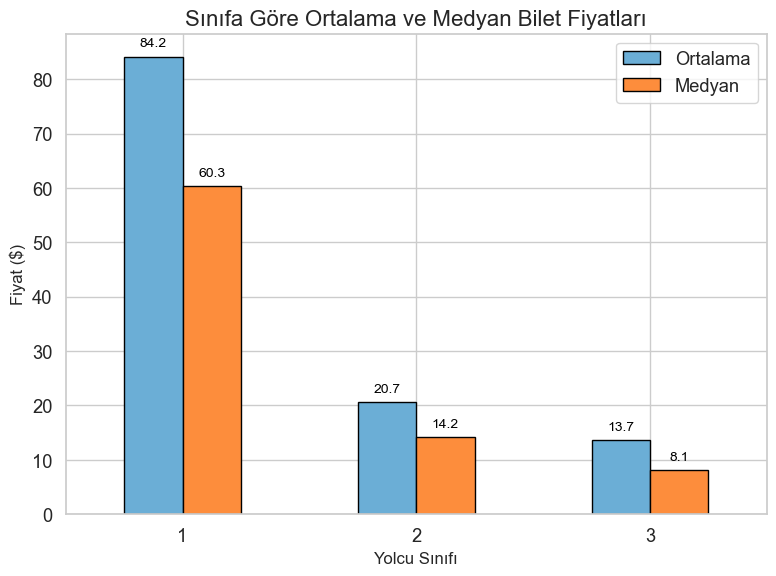

In [61]:
# Estetik tema
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

fare_stats = df_titanic.groupby('Pclass')['Fare'].agg(['mean', 'median'])

# Grafik oluştur
ax = fare_stats.plot(kind='bar', figsize=(8, 6), color=['#6baed6', '#fd8d3c'], edgecolor='black')

# Değer etiketleri
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Sınıfa Göre Ortalama ve Medyan Bilet Fiyatları", fontsize=16)
plt.xlabel("Yolcu Sınıfı", fontsize=12)
plt.ylabel("Fiyat ($)", fontsize=12)
plt.xticks(rotation=0)
plt.legend(["Ortalama", "Medyan"])
plt.tight_layout()
plt.show()

10.	Kazada ölen kadınların oranı ile erkeklerin oranını karşılaştırınız. 

In [65]:
dead_men_ratio = len(df_titanic[(df_titanic['Sex'] == 'male') & (df_titanic['Survived'] == 0)]) / len(df_titanic[df_titanic['Sex'] == 'male'])
dead_women_ratio = len(df_titanic[(df_titanic['Sex'] == 'female') & (df_titanic['Survived'] == 0)]) / len(df_titanic[df_titanic['Sex'] == 'female'])
print(f"Erkeklerin ölüm oranı: %{dead_men_ratio * 100:.2f}")
print(f"Kadınların ölüm oranı: %{dead_women_ratio * 100:.2f}")

Erkeklerin ölüm oranı: %81.11
Kadınların ölüm oranı: %25.80


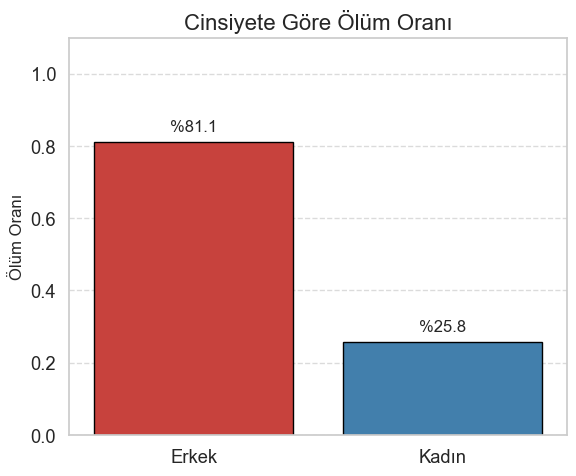

In [63]:
# Ölüm oranlarını hazırlayalım
death_ratios = {
    'Erkek': dead_men_ratio,
    'Kadın': dead_women_ratio
}

plt.figure(figsize=(6, 5))
sns.barplot(x=list(death_ratios.keys()), y=list(death_ratios.values()), palette=['#de2d26', '#3182bd'], edgecolor='black')

# Etiket ekleme
for i, val in enumerate(death_ratios.values()):
    plt.text(i, val + 0.02, f"%{val*100:.1f}", ha='center', va='bottom', fontsize=12)

plt.title('Cinsiyete Göre Ölüm Oranı', fontsize=16)
plt.ylabel('Ölüm Oranı', fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Data Visualization

Yaşın hayatta kalmaya etkisi

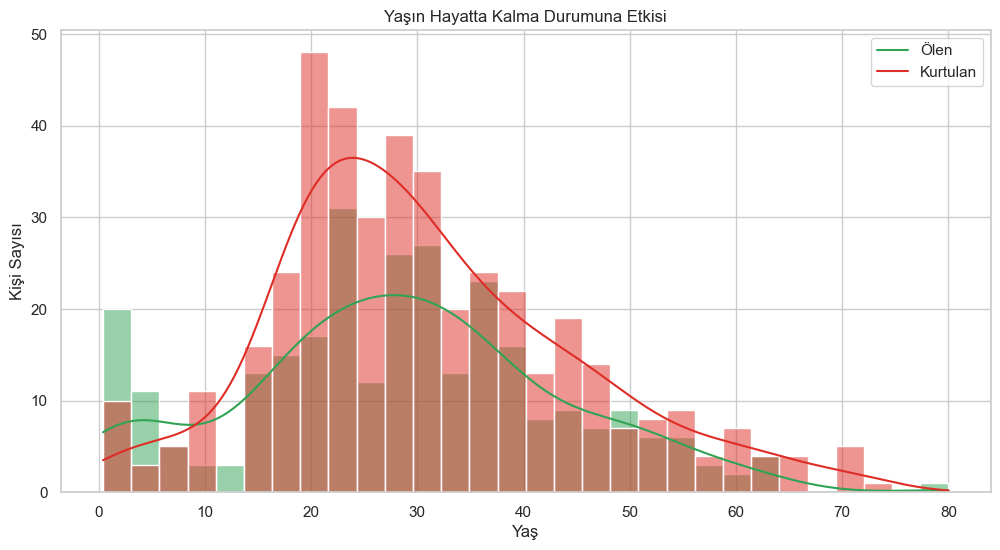

In [84]:
# Genel görünüm için seaborn stili
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Hayatta kalan ve kalamayanların yaş dağılımı -  histogram
sns.histplot(data=df_titanic, x='Age', hue='Survived', kde=True, bins=30, palette=['#de2d26', '#31a354'])
plt.title('Yaşın Hayatta Kalma Durumuna Etkisi')
plt.xlabel('Yaş')
plt.ylabel('Kişi Sayısı')
plt.legend(labels=['Ölen', 'Kurtulan'])
plt.show()


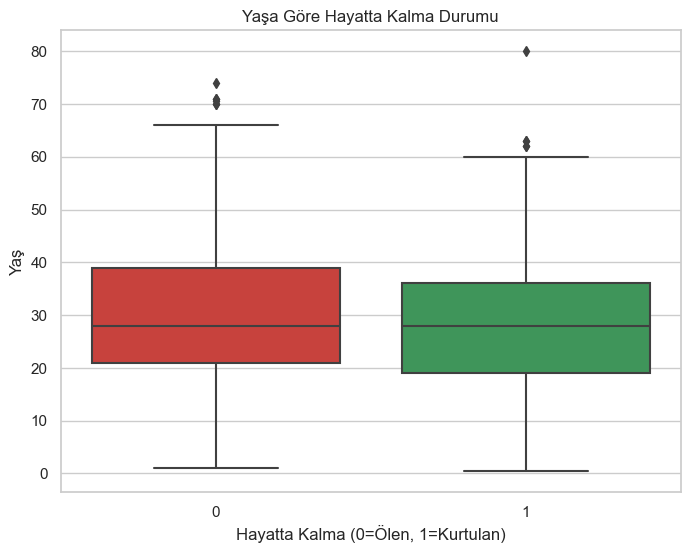

In [82]:
# Yaş ve hayatta kalma durumunu - boxplot 
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_titanic, x='Survived', y='Age', palette=['#de2d26', '#31a354'])
plt.title('Yaşa Göre Hayatta Kalma Durumu')
plt.xlabel('Hayatta Kalma (0=Ölen, 1=Kurtulan)')
plt.ylabel('Yaş')
plt.show()

Cinsiyete göre hayatta kalma oranı

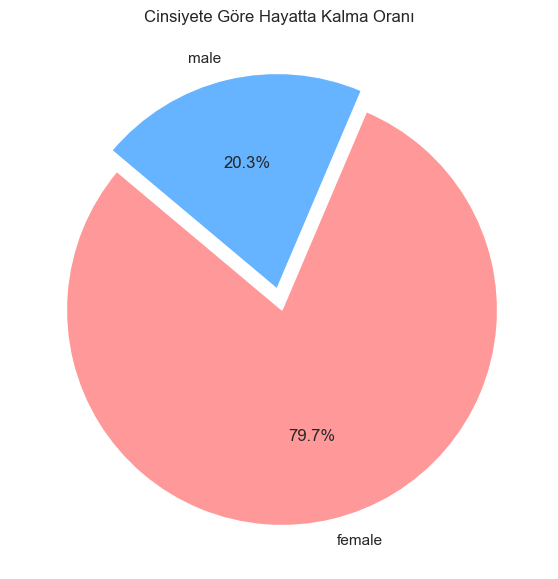

In [74]:
survival_by_sex = df_titanic.groupby('Sex')['Survived'].mean()

plt.figure(figsize=(7,7))
colors = ['#ff9999','#66b3ff']
plt.pie(survival_by_sex, labels=survival_by_sex.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.05,0.05))
plt.title('Cinsiyete Göre Hayatta Kalma Oranı')
plt.show()


Sınıfa göre hayatta kalma oranı 

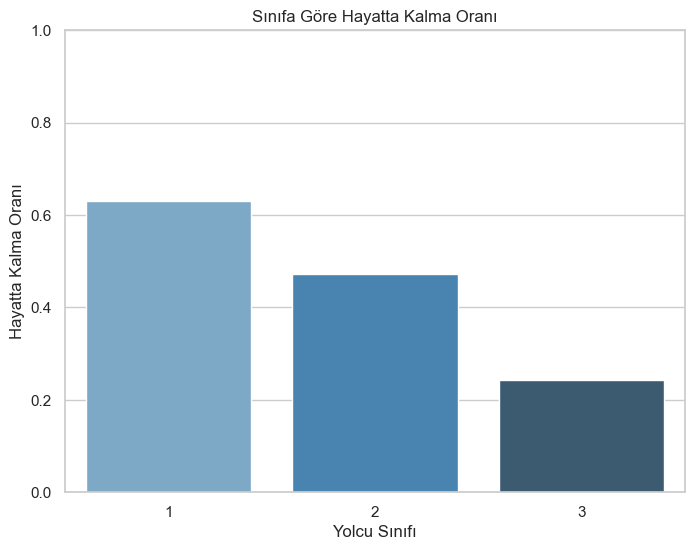

In [77]:
survival_by_class = df_titanic.groupby('Pclass')['Survived'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette='Blues_d')
plt.title('Sınıfa Göre Hayatta Kalma Oranı')
plt.xlabel('Yolcu Sınıfı')
plt.ylabel('Hayatta Kalma Oranı')
plt.ylim(0, 1)
plt.show()


Bilet fiyatı ve hayatta kalma ilişkisi

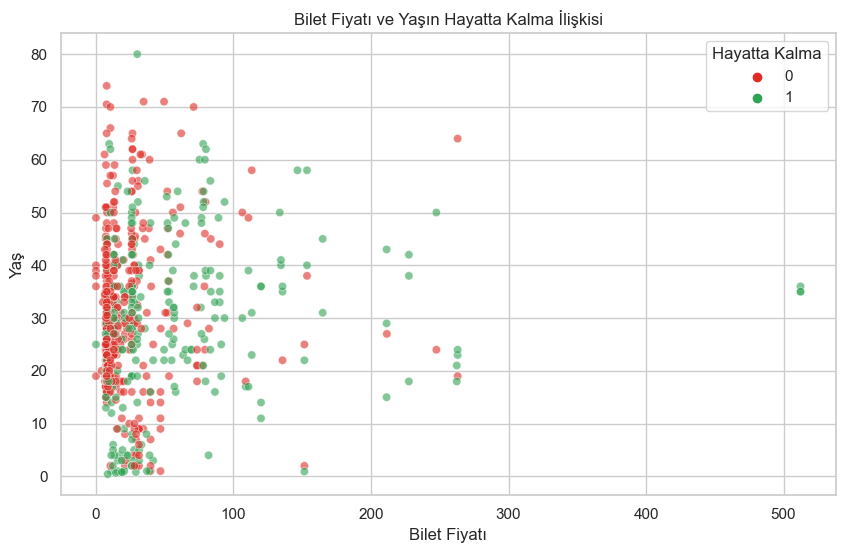

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_titanic, x='Fare', y='Age', hue='Survived', palette=['#de2d26', '#31a354'], alpha=0.6)
plt.title('Bilet Fiyatı ve Yaşın Hayatta Kalma İlişkisi')
plt.xlabel('Bilet Fiyatı')
plt.ylabel('Yaş')
plt.legend(title='Hayatta Kalma')
plt.show()


kayıp yaş analizi

In [87]:
missing_age_count = df_titanic['Age'].isnull().sum()
missing_age_ratio = missing_age_count / len(df_titanic) * 100
print(f"Eksik yaş sayısı: {missing_age_count}")
print(f"Eksik yaş oranı: %{missing_age_ratio:.2f}")

Eksik yaş sayısı: 177
Eksik yaş oranı: %19.87


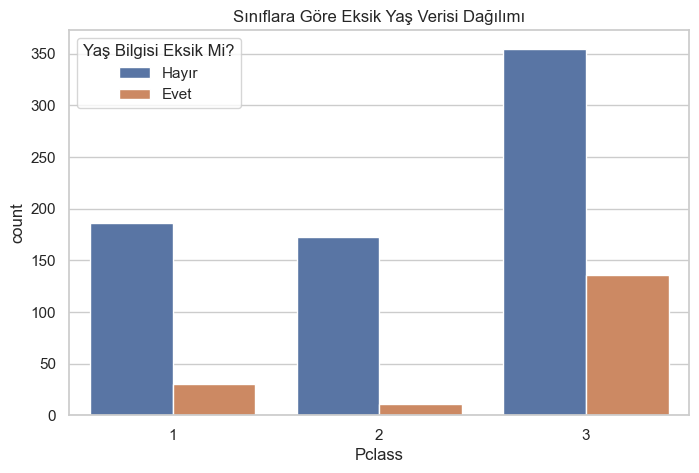

In [93]:
# Eksik yaş bilgisi olanları True, diğerleri False yapıyoruz
df_titanic['Age_missing'] = df_titanic['Age'].isnull()

plt.figure(figsize=(8,5))
sns.countplot(data=df_titanic, x='Pclass', hue='Age_missing')
plt.title("Sınıflara Göre Eksik Yaş Verisi Dağılımı")
plt.legend(title='Yaş Bilgisi Eksik Mi?', labels=['Hayır', 'Evet'])
plt.show()

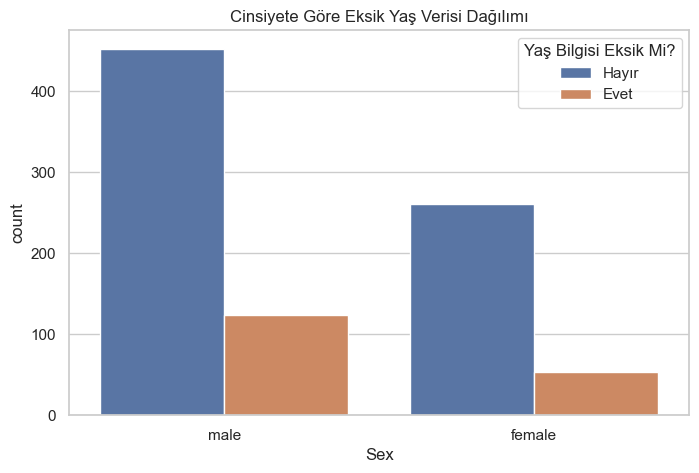

In [97]:
# Eksik yaş bilgisi olanları True, diğerleri False olarak yeni sütun
df_titanic['Age_missing'] = df_titanic['Age'].isnull()

plt.figure(figsize=(8,5))
sns.countplot(data=df_titanic, x='Sex', hue='Age_missing')
plt.title("Cinsiyete Göre Eksik Yaş Verisi Dağılımı")
plt.legend(title='Yaş Bilgisi Eksik Mi?', labels=['Hayır', 'Evet'])
plt.show()

In [108]:
# Cinsiyet ve sınıfa göre yaş bilgisi eksikliği
age_missing = df_titanic.copy()
age_missing['Age_missing'] = age_missing['Age'].isnull()

# Gruplama ve sayma
summary_table = age_missing.groupby(['Pclass', 'Sex'])['Age_missing'].value_counts().unstack().fillna(0)
summary_table.columns = ['Yaş Biliniyor', 'Yaş Bilinmiyor']
summary_table = summary_table.astype(int)

print(" Sınıf ve Cinsiyete Göre Yaş Bilgisinin Eksikliği Tablosu:\n")
print(summary_table)

 Sınıf ve Cinsiyete Göre Yaş Bilgisinin Eksikliği Tablosu:

               Yaş Biliniyor  Yaş Bilinmiyor
Pclass Sex                                  
1      female             85               9
       male              101              21
2      female             74               2
       male               99               9
3      female            102              42
       male              253              94


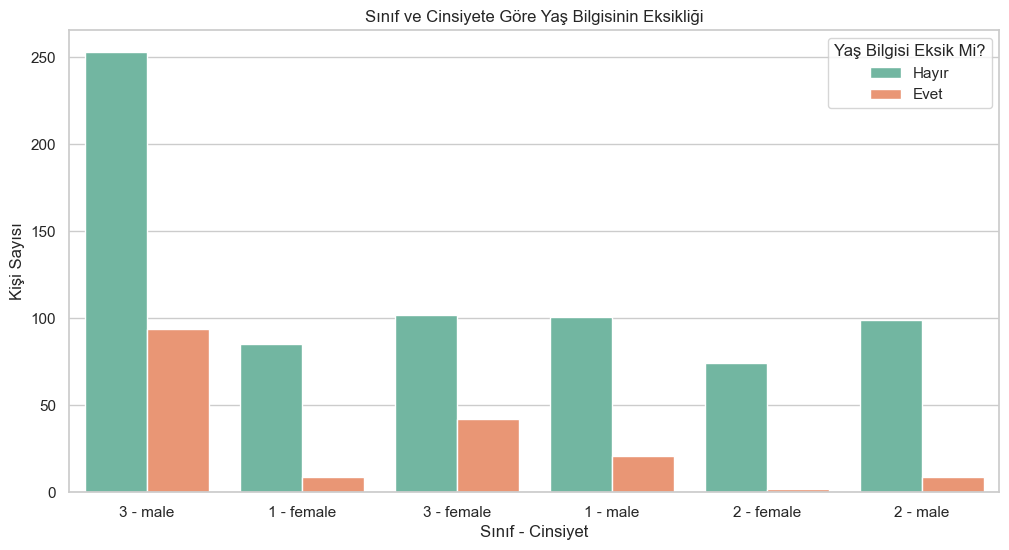

In [106]:

# Yaş bilgisinin eksik olup olmadığını gösteren yeni sütun
df_titanic['Age_missing'] = df_titanic['Age'].isnull()

plt.figure(figsize=(12,6))

# Pclass ve Sex birleşimini x ekseninde gösterelim
sns.countplot(
    data=df_titanic,
    x=df_titanic['Pclass'].astype(str) + " - " + df_titanic['Sex'],
    hue='Age_missing',
    palette='Set2'
)

plt.title("Sınıf ve Cinsiyete Göre Yaş Bilgisinin Eksikliği")
plt.xlabel("Sınıf - Cinsiyet")
plt.ylabel("Kişi Sayısı")
plt.legend(title='Yaş Bilgisi Eksik Mi?', labels=['Hayır', 'Evet'])

plt.show()

In [110]:
# Sınıf ve cinsiyete göre ortalama yaşları hesapla
group_means = df_titanic.groupby(['Pclass', 'Sex'])['Age'].mean()

# Eksik yaşları uygun grup ortalaması ile doldur
def age_imputer(row):
    if pd.isnull(row['Age']):
        return group_means[(row['Pclass'], row['Sex'])]
    else:
        return row['Age']

df_titanic['Age'] = df_titanic.apply(age_imputer, axis=1)
